# Check effects of candidate genes on growth rate and stress survival

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

## Load data from high throughput screens on knockout collection

In [2]:
path = '/Users/chrisgraves/Documents/Yeast_data/external_data/'
os.listdir(path)

['Breslow_rates.csv',
 'Jarolim_exponential_heat_resistance.csv',
 'Qian_competitive_fitness.csv',
 'Zakrzewska_acid.csv',
 'Zakrzewska_growth.csv',
 'Zakrzewska_heat.csv',
 'Zakrzewska_oxidative.csv']

Load and combine data on stress survival from Zakrzewska et al. 2008 study

In [3]:
counter = 0
for f in os.listdir(path):
    if f.split('_')[0] == 'Zakrzewska':
        if counter == 0:
            zak = pd.read_csv(path+f)
        else:
            temp = pd.read_csv(path+f)
            zak = pd.merge(zak,temp, on='strain')
        counter=counter+1

print(zak.shape)
zak.head()

(4066, 21)


,strain,acid_mean,acid_lower,acid_upper,acid_pt_mean,acid_pt_lower,acid_pt_upper,growth_30,growth_38,heat_mean,...,heat_upper,heat_pt_mean,heat_pt_lower,heat_pt_upper,oxidative_mean,oxidative_lower,oxidative_upper,oxidative_pt_mean,oxidative_pt_lower,oxidative_pt_upper
0,YAL004W,59.956620,58.00335207,61.9098872,67.199106,64.88053811,69.51767343,0.456596,0.40283848,0.014071,...,0.514668987,65.112744,61.03273047,69.19275699,9.856012,7.889777467,11.8222473,52.712209,51.51779217,53.90662667
1,YAL005C,61.756668,60.31172522,63.20161119,67.758209,66.0675541,69.44886488,0.424050,0.363141022,0.018908,...,0.246705568,68.147767,65.58550466,70.71003017,12.755347,10.21198756,15.29870627,59.821186,59.32598566,60.31638562
2,YAL008W,80.905708,79.77470241,82.0367129,110.869236,109.4798842,112.2585884,0.383094,0.344193812,0.021217,...,0.967756788,74.234596,73.59927174,74.86992009,18.098631,14.97752514,21.21973778,58.981233,57.7527431,60.2097221
3,YAL010C,109.654126,107.8602321,111.4480196,150.446431,141.4386709,159.4541905,0.348863,0.382531986,0.080941,...,5.512427563,38.701433,36.48518092,40.91768546,24.721095,21.98627811,27.45591217,98.489747,89.71017056,107.2693227
4,YAL011W,73.838673,72.57275496,75.1045907,81.689552,79.14522869,84.23387521,0.400872,0.441868342,0.031438,...,1.46416394,65.713649,62.30574372,69.12155378,24.443096,20.70422839,28.18196454,65.973874,62.59723725,69.35051011


Load high resolution growth rate data from Breslow et al. 2008 

In [4]:
breslow = pd.read_csv(path+'Breslow_rates.csv')
breslow.columns = ['strain','breslow_rate']
combined = pd.merge(zak,breslow)
print(combined.shape)
combined.head()

(3729, 22)


,strain,acid_mean,acid_lower,acid_upper,acid_pt_mean,acid_pt_lower,acid_pt_upper,growth_30,growth_38,heat_mean,...,heat_pt_mean,heat_pt_lower,heat_pt_upper,oxidative_mean,oxidative_lower,oxidative_upper,oxidative_pt_mean,oxidative_pt_lower,oxidative_pt_upper,breslow_rate
0,YAL004W,59.956620,58.00335207,61.9098872,67.199106,64.88053811,69.51767343,0.456596,0.40283848,0.014071,...,65.112744,61.03273047,69.19275699,9.856012,7.889777467,11.8222473,52.712209,51.51779217,53.90662667,1.011
1,YAL005C,61.756668,60.31172522,63.20161119,67.758209,66.0675541,69.44886488,0.424050,0.363141022,0.018908,...,68.147767,65.58550466,70.71003017,12.755347,10.21198756,15.29870627,59.821186,59.32598566,60.31638562,0.992
2,YAL008W,80.905708,79.77470241,82.0367129,110.869236,109.4798842,112.2585884,0.383094,0.344193812,0.021217,...,74.234596,73.59927174,74.86992009,18.098631,14.97752514,21.21973778,58.981233,57.7527431,60.2097221,1.009
3,YAL010C,109.654126,107.8602321,111.4480196,150.446431,141.4386709,159.4541905,0.348863,0.382531986,0.080941,...,38.701433,36.48518092,40.91768546,24.721095,21.98627811,27.45591217,98.489747,89.71017056,107.2693227,1.002
4,YAL011W,73.838673,72.57275496,75.1045907,81.689552,79.14522869,84.23387521,0.400872,0.441868342,0.031438,...,65.713649,62.30574372,69.12155378,24.443096,20.70422839,28.18196454,65.973874,62.59723725,69.35051011,0.882


Load competitive fitness in different growth conditions from Qian et al. 2012

In [5]:
qian = pd.read_csv(path+'Qian_competitive_fitness.csv')
combined = pd.merge(combined,qian)
print(combined.shape)
combined.head()

(3579, 36)


,strain,acid_mean,acid_lower,acid_upper,acid_pt_mean,acid_pt_lower,acid_pt_upper,growth_30,growth_38,heat_mean,...,YPG,YPG_Q,YPE,YPE_Q,SC,SC_Q,OAK,OAK_Q,ETH,ETH_Q
0,YAL004W,59.956620,58.00335207,61.9098872,67.199106,64.88053811,69.51767343,0.456596,0.40283848,0.014071,...,0.9514,0.00000,0.9602,0.00266,1.0372,0,0.8117,0.00000,1.0058,0.20994
1,YAL005C,61.756668,60.31172522,63.20161119,67.758209,66.0675541,69.44886488,0.424050,0.363141022,0.018908,...,0.9374,0.00000,0.9197,0.00000,1.0301,0,0.7887,0.00000,1.0017,0.34266
2,YAL008W,80.905708,79.77470241,82.0367129,110.869236,109.4798842,112.2585884,0.383094,0.344193812,0.021217,...,1.0090,0.18729,1.0162,0.14371,1.0514,0,1.0101,0.45330,1.0002,0.38595
3,YAL011W,73.838673,72.57275496,75.1045907,81.689552,79.14522869,84.23387521,0.400872,0.441868342,0.031438,...,1.0247,0.00739,1.0133,0.19194,1.0366,0,0.8330,0.00000,0.8425,0.00000
4,YAL014C,79.740346,78.68573917,80.79495285,91.346021,89.03304664,93.65899463,0.406944,0.334421274,0.024576,...,1.0576,0.00000,1.0556,0.00003,1.0666,0,0.9930,0.47798,1.0038,0.27503


Load set of knockouts that altered heat shock resistance during exponential growth (Jarolim et al. 2013)

In [6]:
#Load data
jar_exp = pd.read_csv(path+'Jarolim_exponential_heat_resistance.csv')
print(jar_exp.shape)
resistant = jar_exp[jar_exp['heat_resistance'] >0]
print(resistant.shape)
resistant.head()

(416, 2)
(101, 2)


,strain,heat_resistance
0,YOL165C,4
1,YBR077C,3
2,YBR249C,3
3,YDL017W,3
4,YDL172C,3


In [7]:
#merge to keep subset that increases resistance to heat shock
hs_resistant = pd.merge(combined,resistant,on='strain')
print(hs_resistant.shape)
hs_resistant.head()

(59, 37)


,strain,acid_mean,acid_lower,acid_upper,acid_pt_mean,acid_pt_lower,acid_pt_upper,growth_30,growth_38,heat_mean,...,YPG_Q,YPE,YPE_Q,SC,SC_Q,OAK,OAK_Q,ETH,ETH_Q,heat_resistance
0,YBL089W,57.940886,56.81068807,59.07108421,78.569847,77.86704628,79.27264819,0.365505,0.369870707,0.023915,...,0.00000,0.8972,0.00000,0.8678,0.00000,0.9592,0.18623,0.9748,0.00035,2
1,YBR059C,151.241838,149.4288724,153.0548035,172.714348,169.816933,175.6117623,0.358597,0.467878822,0.055130,...,0.32994,1.0584,0.00001,0.9754,0.00006,0.8110,0.00000,0.9969,0.29959,1
2,YBR084C-A,85.218339,83.69262865,86.74404902,70.957209,69.78508599,72.12933152,0.226219,0.259932975,0.096977,...,0.00000,0.8962,0.00000,0.8736,0.00000,0.8478,0.00000,0.8975,0.00000,1
3,YBR288C,75.338971,74.90007657,75.77786489,94.948177,94.67370155,95.22265311,0.350853,0.422203437,0.026737,...,0.00000,0.7059,0.00000,0.8224,0.00000,0.6028,0.00000,0.9687,0.00001,1
4,YCL063W,73.397588,72.49677033,74.29840586,71.858304,70.79462748,72.92198019,0.326573,0.338099165,0.036806,...,0.00618,1.0362,0.00598,1.0000,0.43089,0.9919,0.47022,0.9613,0.00000,2


In [8]:
#isolate data corresponding to target genes
mds3 = combined[combined['strain']=='YGL197W']
sok2 = combined[combined['strain']=='YMR016C']

## Correlation between growth rate and heat resistance

In [9]:
growth_vars = ['growth_30','YPD_1','YPG','YPE','SC','OAK','ETH','breslow_rate']

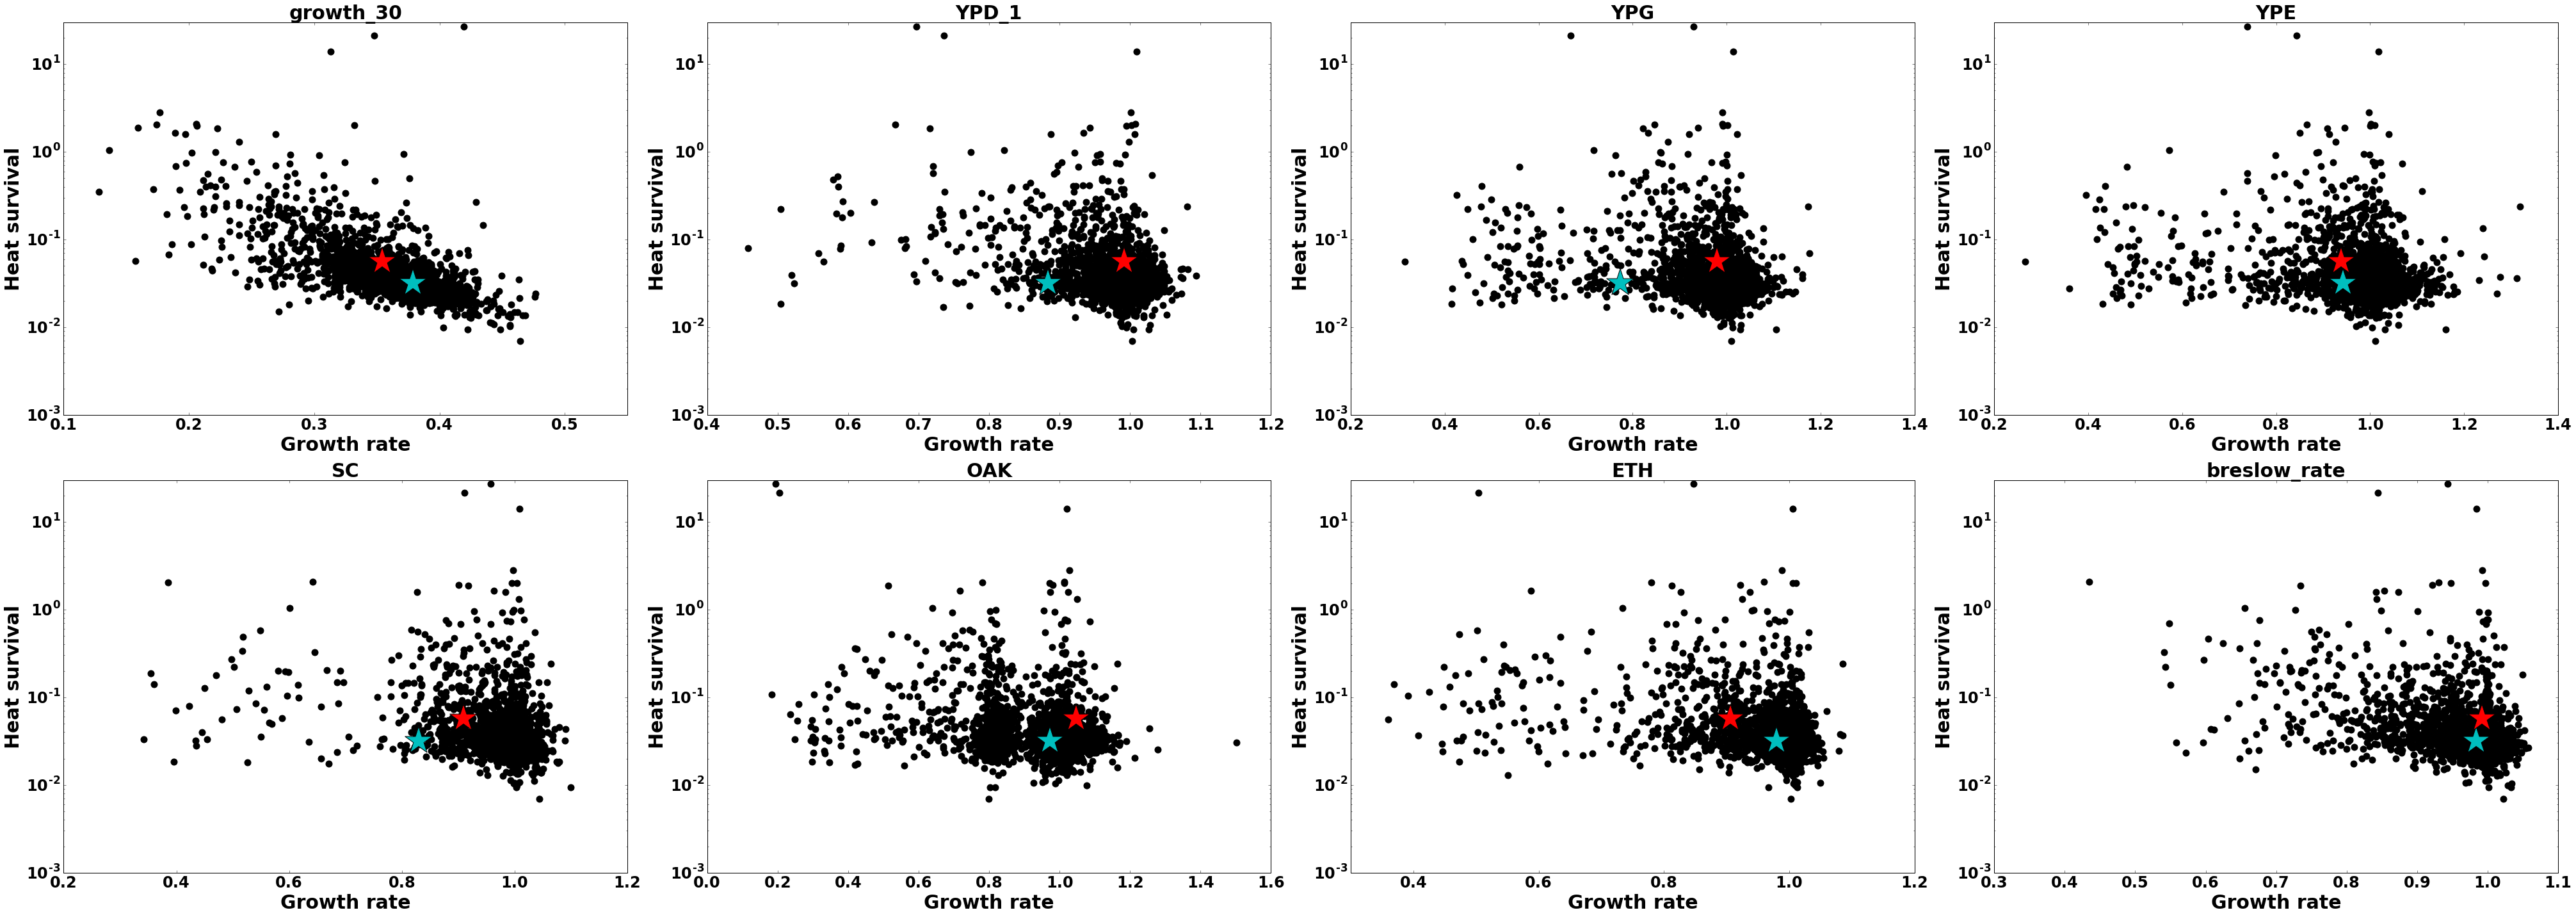

In [10]:
counter = 1
fig = plt.figure(figsize=(56,20))
for var in growth_vars:
    plt.subplot(2,4,counter)
    counter = counter+1
    ax = plt.gca()
    ax.set_ylim([0.001,30])
    plt.scatter(combined[var],combined['heat_mean'],c='k',s=100)
    plt.scatter(sok2[var],sok2['heat_mean'],c='c',s=2000,marker='*')
    plt.scatter(mds3[var],mds3['heat_mean'],c='r',s=2000,marker='*')
    plt.title(var,fontsize=30,fontweight='bold')
    plt.xlabel('Growth rate',fontsize=30,fontweight='bold')
    plt.ylabel('Heat survival',fontsize=30,fontweight='bold')        
    plt.yticks(size=24,fontweight='bold')
    plt.xticks(size=24,fontweight='bold')
    ax.set_yscale('log')
plt.tight_layout()

## Anything special about candidate mutations with respect to growth rate or heat survival?

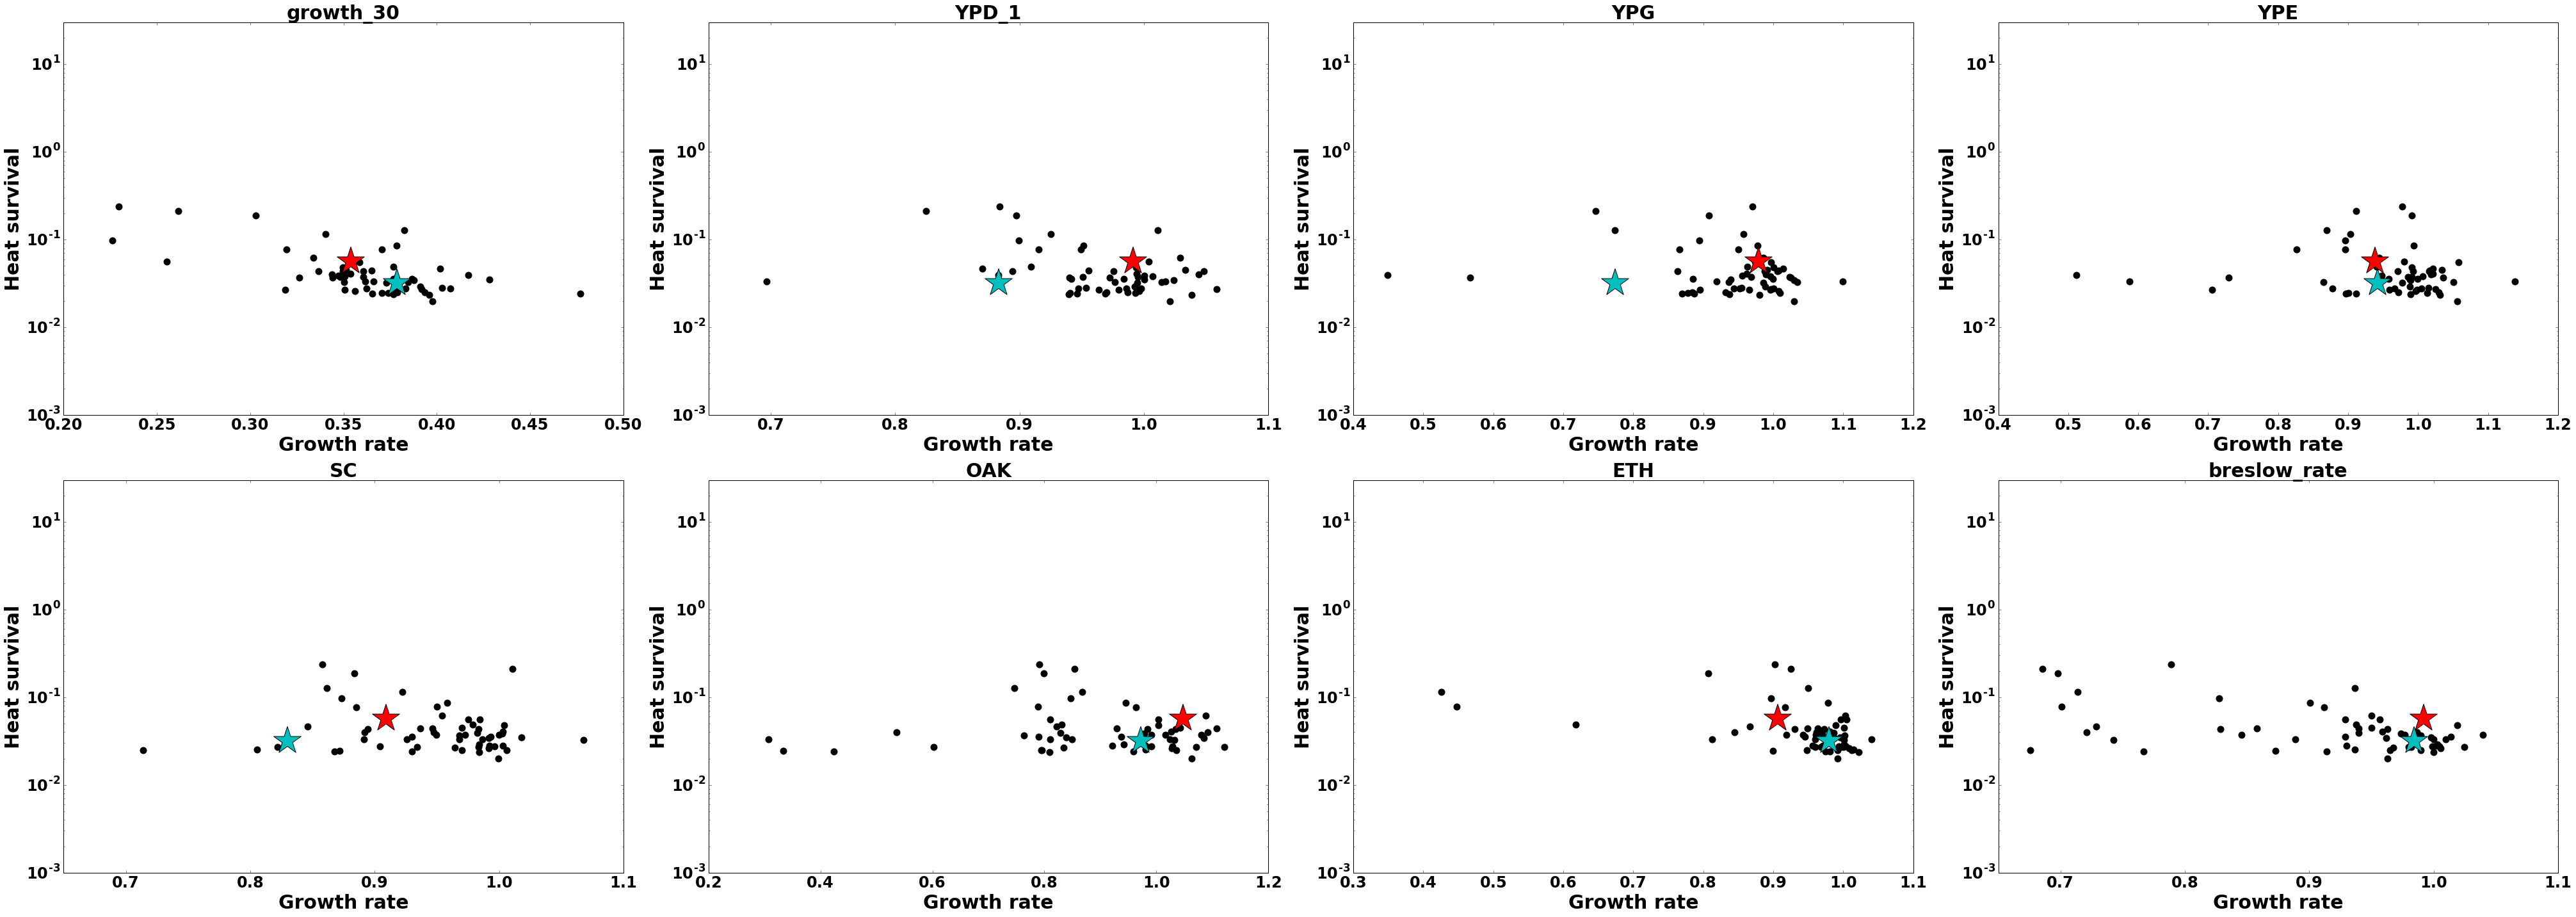

In [11]:
counter = 1
fig = plt.figure(figsize=(56,20))
for var in growth_vars:
    plt.subplot(2,4,counter)
    counter = counter+1
    ax = plt.gca()
    ax.set_ylim([0.001,30])
    plt.scatter(hs_resistant[var],hs_resistant['heat_mean'],c='k',s=100)
    plt.scatter(sok2[var],sok2['heat_mean'],c='c',s=2000,marker='*')
    plt.scatter(mds3[var],mds3['heat_mean'],c='r',s=2000,marker='*')
    plt.title(var,fontsize=30,fontweight='bold')
    plt.xlabel('Growth rate',fontsize=30,fontweight='bold')
    plt.ylabel('Heat survival',fontsize=30,fontweight='bold')        
    plt.yticks(size=24,fontweight='bold')
    plt.xticks(size=24,fontweight='bold')
    ax.set_yscale('log')
plt.tight_layout()

## Check effects of mds3 and sok2 knockouts on different stresses

In [14]:
stress_vars = ['acid_mean','heat_mean','oxidative_mean']
env_vars = ['growth_30','SC','YPD_1']

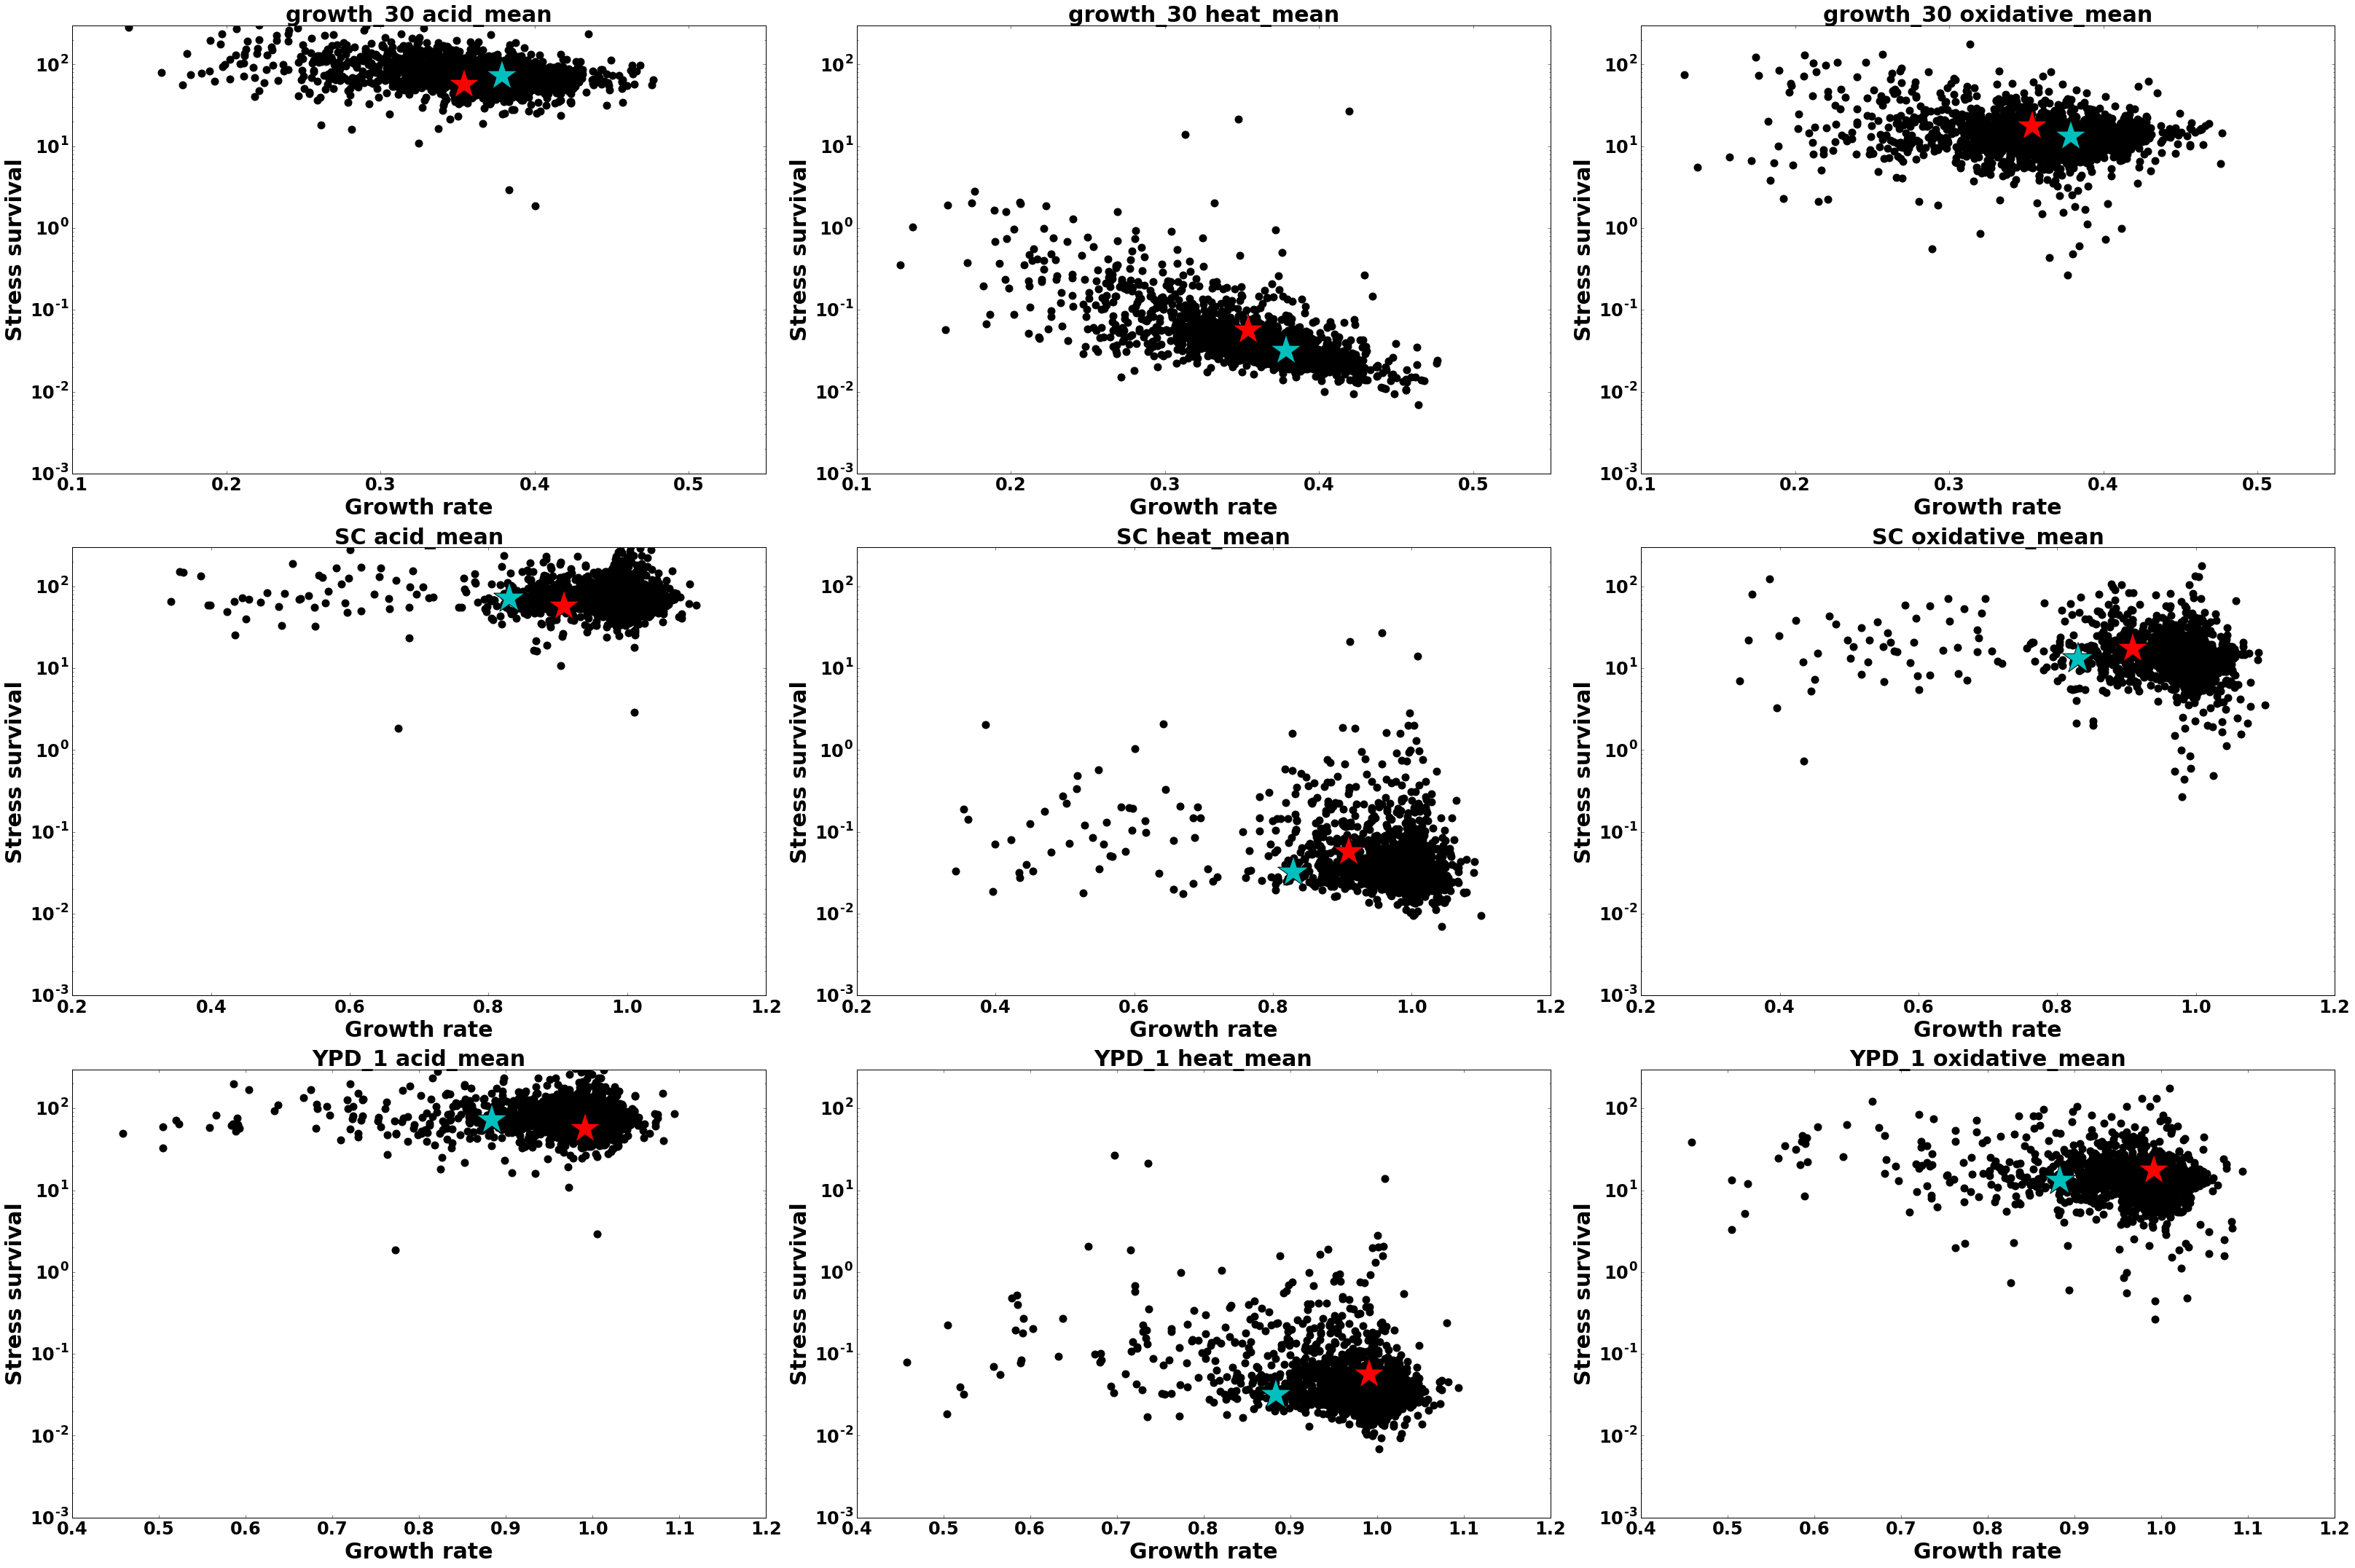

In [22]:
counter = 1
fig = plt.figure(figsize=(45,30))

for var in env_vars:
    for var2 in stress_vars:
        plt.subplot(3,3,counter)
        counter = counter+1
        ax = plt.gca()
        ax.set_ylim([0.001,300])
        plt.scatter(combined[var],combined[var2],c='k',s=100)
        plt.scatter(sok2[var],sok2[var2],c='c',s=2000,marker='*')
        plt.scatter(mds3[var],mds3[var2],c='r',s=2000,marker='*')
        plt.title(var+' '+var2,fontsize=30,fontweight='bold')
        plt.xlabel('Growth rate',fontsize=30,fontweight='bold')
        plt.ylabel('Stress survival',fontsize=30,fontweight='bold')        
        plt.yticks(size=24,fontweight='bold')
        plt.xticks(size=24,fontweight='bold')
        ax.set_yscale('log')
plt.tight_layout()

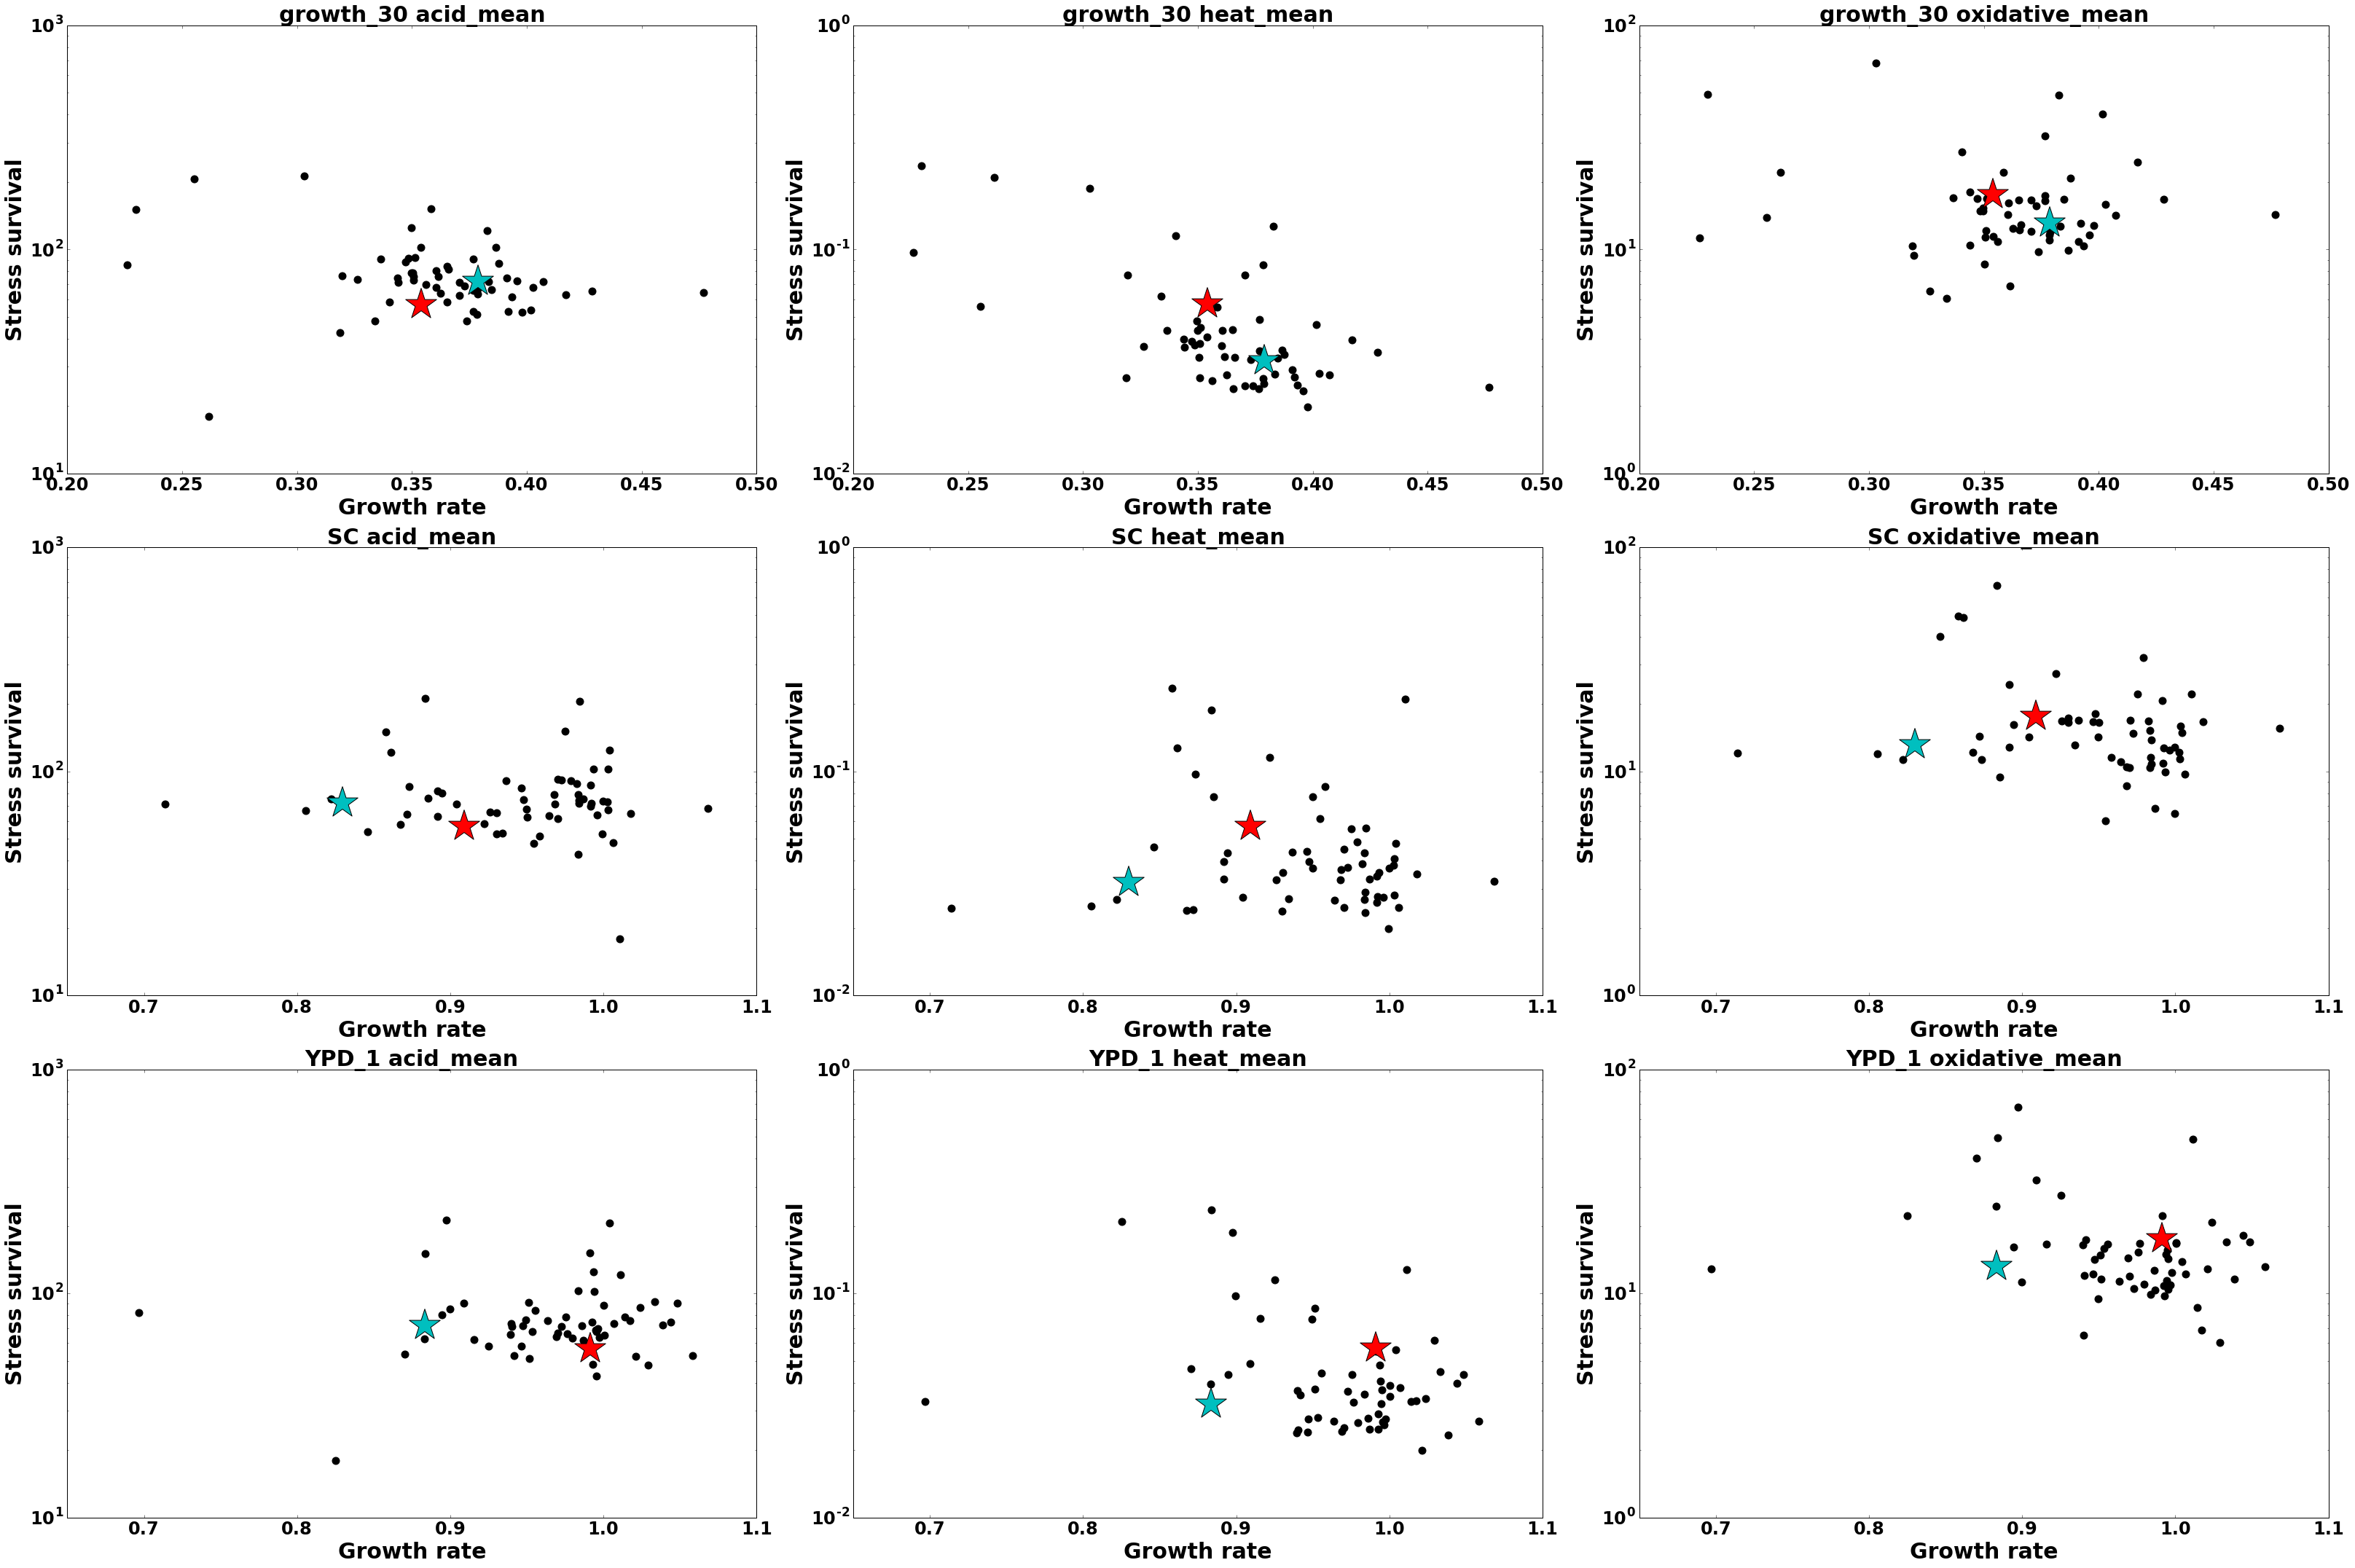

In [19]:
counter = 1
fig = plt.figure(figsize=(45,30))

for var in env_vars:
    for var2 in stress_vars:
        plt.subplot(3,3,counter)
        counter = counter+1
        ax = plt.gca()
        #ax.set_ylim([0.001,30])
        plt.scatter(hs_resistant[var],hs_resistant[var2],c='k',s=100)
        plt.scatter(sok2[var],sok2[var2],c='c',s=2000,marker='*')
        plt.scatter(mds3[var],mds3[var2],c='r',s=2000,marker='*')
        plt.title(var+' '+var2,fontsize=30,fontweight='bold')
        plt.xlabel('Growth rate',fontsize=30,fontweight='bold')
        plt.ylabel('Stress survival',fontsize=30,fontweight='bold')        
        plt.yticks(size=24,fontweight='bold')
        plt.xticks(size=24,fontweight='bold')
        ax.set_yscale('log')
plt.tight_layout()